About Dataset
Synthetic Dataset for Risk Assessment and Loan Approval Modeling
This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.
Binary Classification: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.
The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

<ul>
  <li>ApplicationDate: Loan application date</li>
  <li>Age: Applicant's age</li>
  <li>AnnualIncome: Yearly income</li>
  <li>CreditScore: Creditworthiness score</li>
  <li>EmploymentStatus: Job situation</li>
  <li>EducationLevel: Highest education attained</li>
  <li>Experience: Work experience</li>
  <li>LoanAmount: Requested loan size</li>
  <li>LoanDuration: Loan repayment period</li>
  <li>MaritalStatus: Applicant's marital state</li>
  <li>NumberOfDependents: Number of dependents</li>
  <li>HomeOwnershipStatus: Homeownership type</li>
  <li>MonthlyDebtPayments: Monthly debt obligations</li>
  <li>CreditCardUtilizationRate: Credit card usage percentage</li>
  <li>NumberOfOpenCreditLines: Active credit lines</li>
  <li>NumberOfCreditInquiries: Credit checks count</li>
  <li>DebtToIncomeRatio: Debt to income proportion</li>
  <li>BankruptcyHistory: Bankruptcy records</li>
  <li>LoanPurpose: Reason for loan</li>
  <li>PreviousLoanDefaults: Prior loan defaults</li>
  <li>PaymentHistory: Past payment behavior</li>
  <li>LengthOfCreditHistory: Credit history duration</li>
  <li>SavingsAccountBalance: Savings account amount</li>
  <li>CheckingAccountBalance: Checking account funds</li>
  <li>TotalAssets: Total owned assets</li>
  <li>TotalLiabilities: Total owed debts</li>
  <li>MonthlyIncome: Income per month</li>
  <li>UtilityBillsPaymentHistory: Utility payment record</li>
  <li>JobTenure: Job duration</li>
  <li>NetWorth: Total financial worth</li>
  <li>BaseInterestRate: Starting interest rate</li>
  <li>InterestRate: Applied interest rate</li>
  <li>MonthlyLoanPayment: Monthly loan payment</li>
  <li>TotalDebtToIncomeRatio: Total debt against income</li>
  <li>LoanApproved: Loan approval status</li>
  <li>RiskScore: Risk assessment score</li>
</ul>


# ANN project 

In [1]:
# here in this deep learning 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot  as plt 
%matplotlib inline

import seaborn as sns 
import scipy as py 
# import sweetviz as sv
from ydata_profiling import ProfileReport
from datetime import datetime


import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential  

from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from mlxtend.plotting import plot_decision_regions

# from keras_tuner import RandomSearch

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras.callbacks import EarlyStopping


In [2]:
loan_status  = pd.read_csv('Loan.csv')
loan_status.head(5)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
print(loan_status.columns)

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')


In [4]:
loan_satus  = loan_status.drop(['RiskScore'], axis=1, inplace=True)


In [5]:
loan_status.sample(5)  # This will return 5 random rows from the DataFrame

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
17925,2067-01-29,37,27054,574,Unemployed,High School,16,37040,60,Divorced,...,9989,2254.500000,0.899582,6,5255,0.255040,0.244349,1074.936696,0.732285,0
8880,2042-04-25,18,40460,565,Employed,Master,0,15197,108,Single,...,16780,3371.666667,0.960708,3,11021,0.277697,0.282624,389.437960,0.403788,0
12126,2051-03-15,38,93542,619,Unemployed,Associate,13,41252,36,Married,...,33398,7795.166667,0.872913,3,36899,0.216752,0.243472,1625.963578,0.278245,0
8997,2042-08-20,59,80001,486,Unemployed,Bachelor,37,48631,36,Single,...,5730,6666.750000,0.435902,5,52684,0.290631,0.284373,2023.058757,0.482403,0
13000,2053-08-05,40,49092,437,Unemployed,High School,19,38704,84,Married,...,13384,4091.000000,0.706828,6,13425,0.345204,0.367580,1287.689896,0.364627,0


In [6]:
loan_status.shape

(20000, 35)

In [7]:
loan_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [8]:
no_values = loan_status.isnull().sum()
print(f"here we printing the no values {no_values}")

here we printing the no values ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInter

In [9]:
duplicated = loan_status.duplicated().sum()
print(f"The total duplicted value  : {duplicated}")

The total duplicted value  : 0


In [10]:
loan_status.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,3.625241e+04,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,4.725151e+04,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,1.119675e+04,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,2.220300e+04,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,4.314650e+04,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,1.417302e+06,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000


In [11]:
loan_status.describe().corr()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
Age,1.000000,-0.193680,0.999627,0.999999,-0.129520,0.999998,0.999996,0.991417,0.999996,0.999997,...,-0.145137,0.527311,0.999996,0.999997,-0.153212,0.999996,0.999996,0.870693,0.999996,0.999996
AnnualIncome,-0.193680,1.000000,-0.181675,-0.193750,0.997198,-0.192077,-0.195961,-0.063946,-0.196129,-0.195631,...,0.994751,0.728863,-0.196143,-0.195536,0.995030,-0.196153,-0.196151,0.313541,-0.195952,-0.196122
CreditScore,0.999627,-0.181675,1.000000,0.999600,-0.116641,0.999648,0.999561,0.992760,0.999559,0.999568,...,-0.134415,0.538111,0.999559,0.999571,-0.142775,0.999559,0.999559,0.876082,0.999561,0.999558
Experience,0.999999,-0.193750,0.999600,1.000000,-0.129620,0.999997,0.999997,0.991403,0.999997,0.999998,...,-0.145162,0.527232,0.999997,0.999998,-0.153224,0.999997,0.999997,0.870668,0.999997,0.999997
LoanAmount,-0.129520,0.997198,-0.116641,-0.129620,1.000000,-0.127886,-0.131872,0.001196,-0.132041,-0.131535,...,0.992866,0.772393,-0.132054,-0.131436,0.992283,-0.132066,-0.132064,0.373867,-0.131864,-0.132035
LoanDuration,0.999998,-0.192077,0.999648,0.999997,-0.127886,1.000000,0.999990,0.991633,0.999989,0.999991,...,-0.143606,0.528760,0.999989,0.999992,-0.151676,0.999989,0.999989,0.871480,0.999990,0.999989
NumberOfDependents,0.999996,-0.195961,0.999561,0.999997,-0.131872,0.999990,1.000000,0.991101,1.000000,1.000000,...,-0.147323,0.525275,1.000000,1.000000,-0.155382,1.000000,1.000000,0.869568,1.000000,1.000000
MonthlyDebtPayments,0.991417,-0.063946,0.992760,0.991403,0.001196,0.991633,0.991101,1.000000,0.991078,0.991146,...,-0.015794,0.633726,0.991076,0.991160,-0.024005,0.991075,0.991075,0.927294,0.991102,0.991079
CreditCardUtilizationRate,0.999996,-0.196129,0.999559,0.999997,-0.132041,0.999989,1.000000,0.991078,1.000000,1.000000,...,-0.147488,0.525126,1.000000,1.000000,-0.155547,1.000000,1.000000,0.869484,1.000000,1.000000
NumberOfOpenCreditLines,0.999997,-0.195631,0.999568,0.999998,-0.131535,0.999991,1.000000,0.991146,1.000000,1.000000,...,-0.146995,0.525563,1.000000,1.000000,-0.155056,1.000000,1.000000,0.869734,1.000000,1.000000


In [12]:
loan_status.head(5)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [13]:
# here it ussed the for the model 
categorical_columns = loan_status.select_dtypes(include=['object', 'category', 'bool']).columns
print(categorical_columns)


Index(['ApplicationDate', 'EmploymentStatus', 'EducationLevel',
       'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')


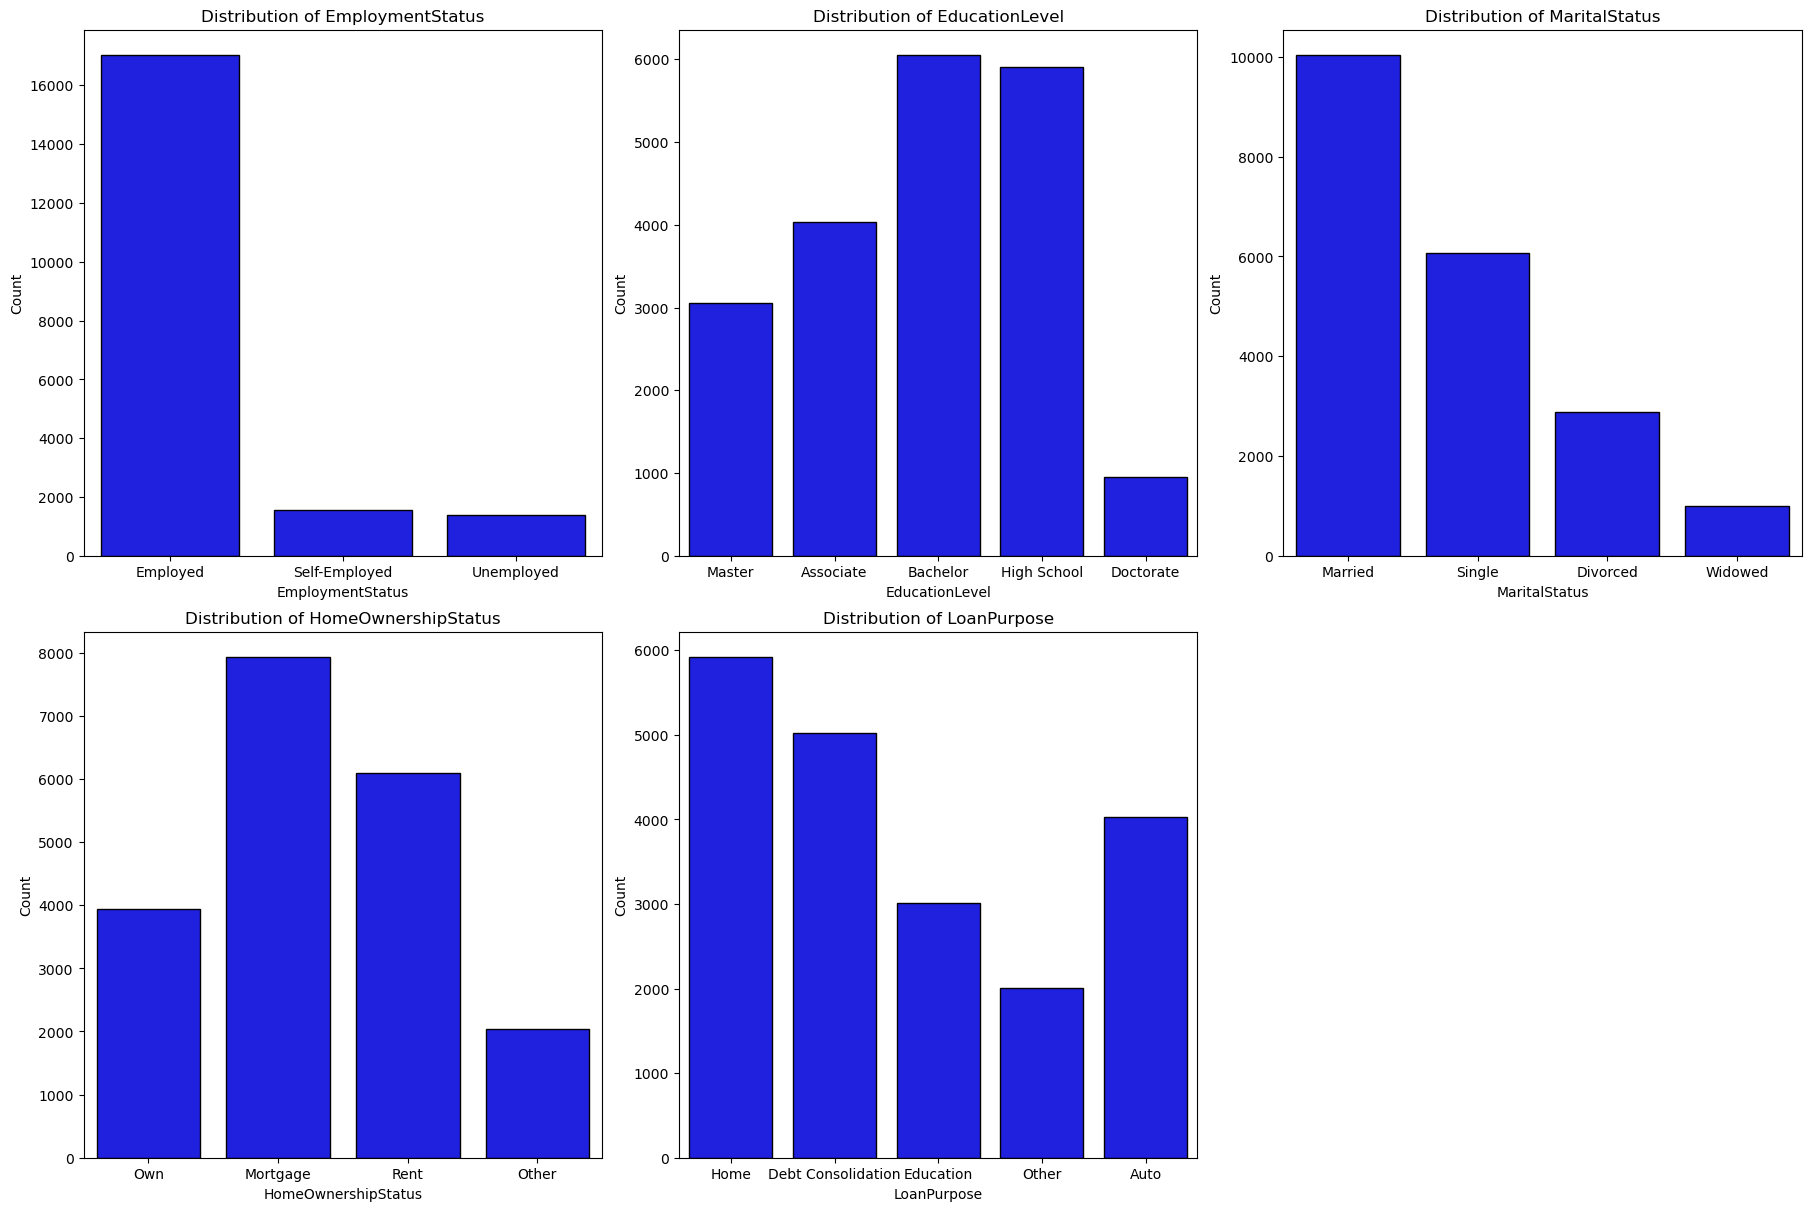

In [14]:
# List of columns to plot
categorical_columns = [
 'EmploymentStatus','EducationLevel','MaritalStatus','HomeOwnershipStatus','LoanPurpose'
    
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=loan_status, x=column, edgecolor='black',color = 'b', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

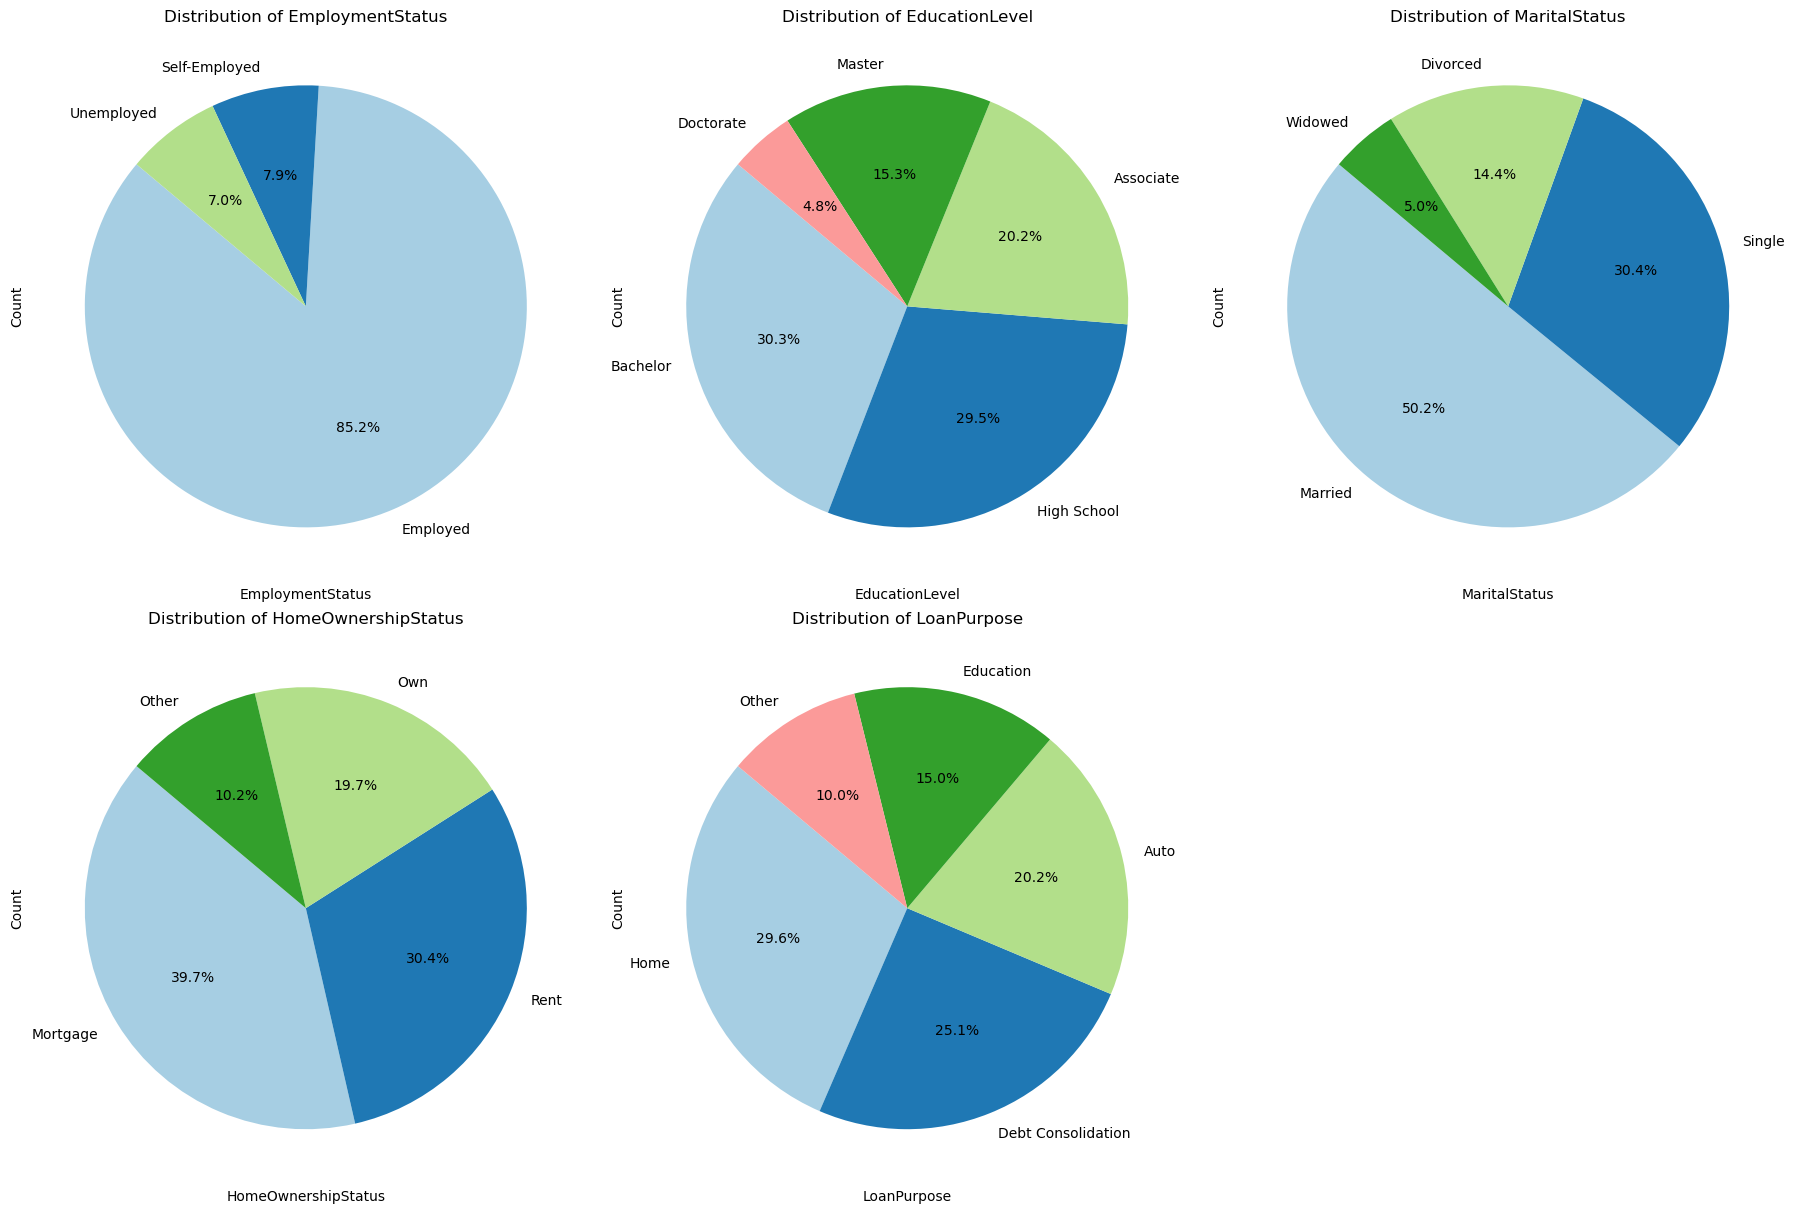

In [15]:
categorical_columns = [
 'EmploymentStatus', 'EducationLevel','MaritalStatus','HomeOwnershipStatus','LoanPurpose',
    
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    # Ensure the column is treated as a categorical variable
    value_counts = loan_status[column].value_counts()
    
    # Plot pie chart
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(value_counts))))
    axes[i].set_title(f'Distribution of {column}')
    # #  axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count') 

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):                                                                                            
    fig.delaxes(axes[j])

plt.show() 

In [16]:
numerical_columns = loan_status.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)


Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved'],
      dtype='object')


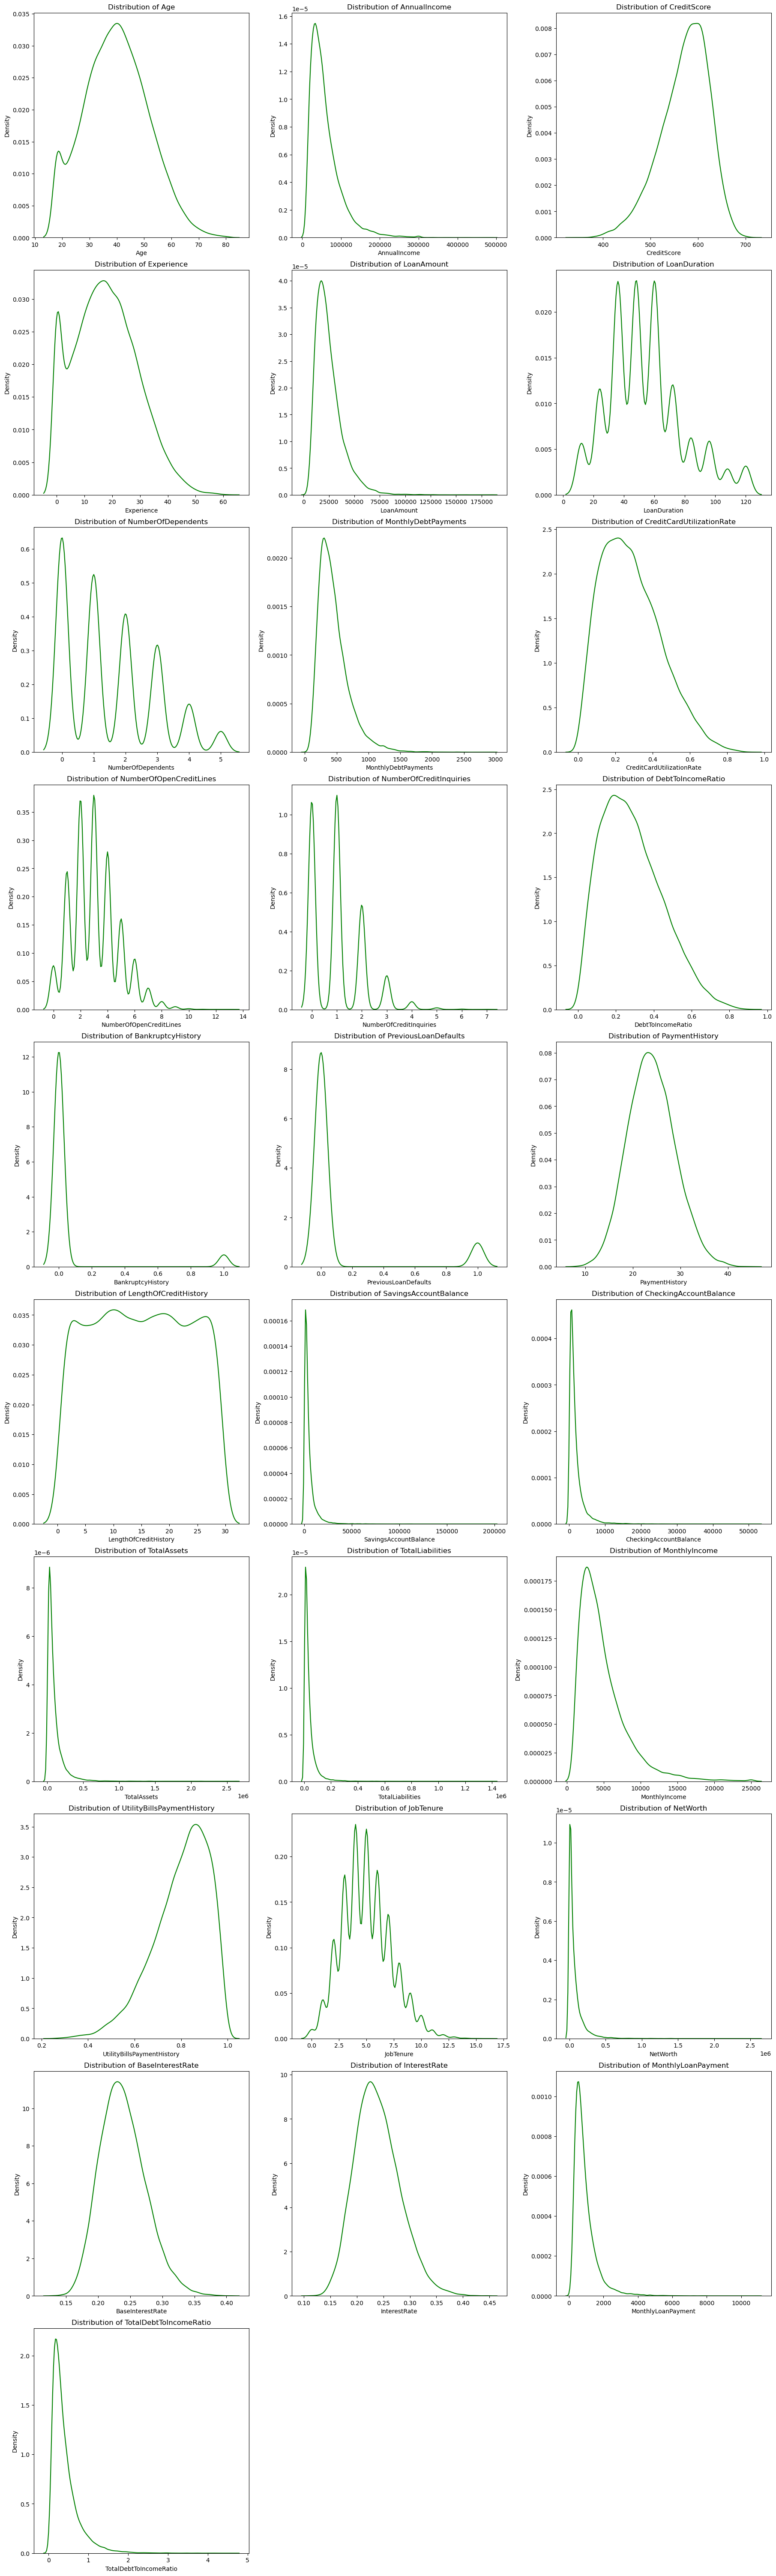

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot
numerical_columns = [
    'Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
    'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
    'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
    'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
    'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
    'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
    'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
    'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'
]

# Number of columns for subplots
n_cols = 3  # Number of plots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=loan_status, x=column, color='g', ax=axes[i])  # KDE plot for each numerical column
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Set x-axis label
    axes[i].set_ylabel('Density')  # Set y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


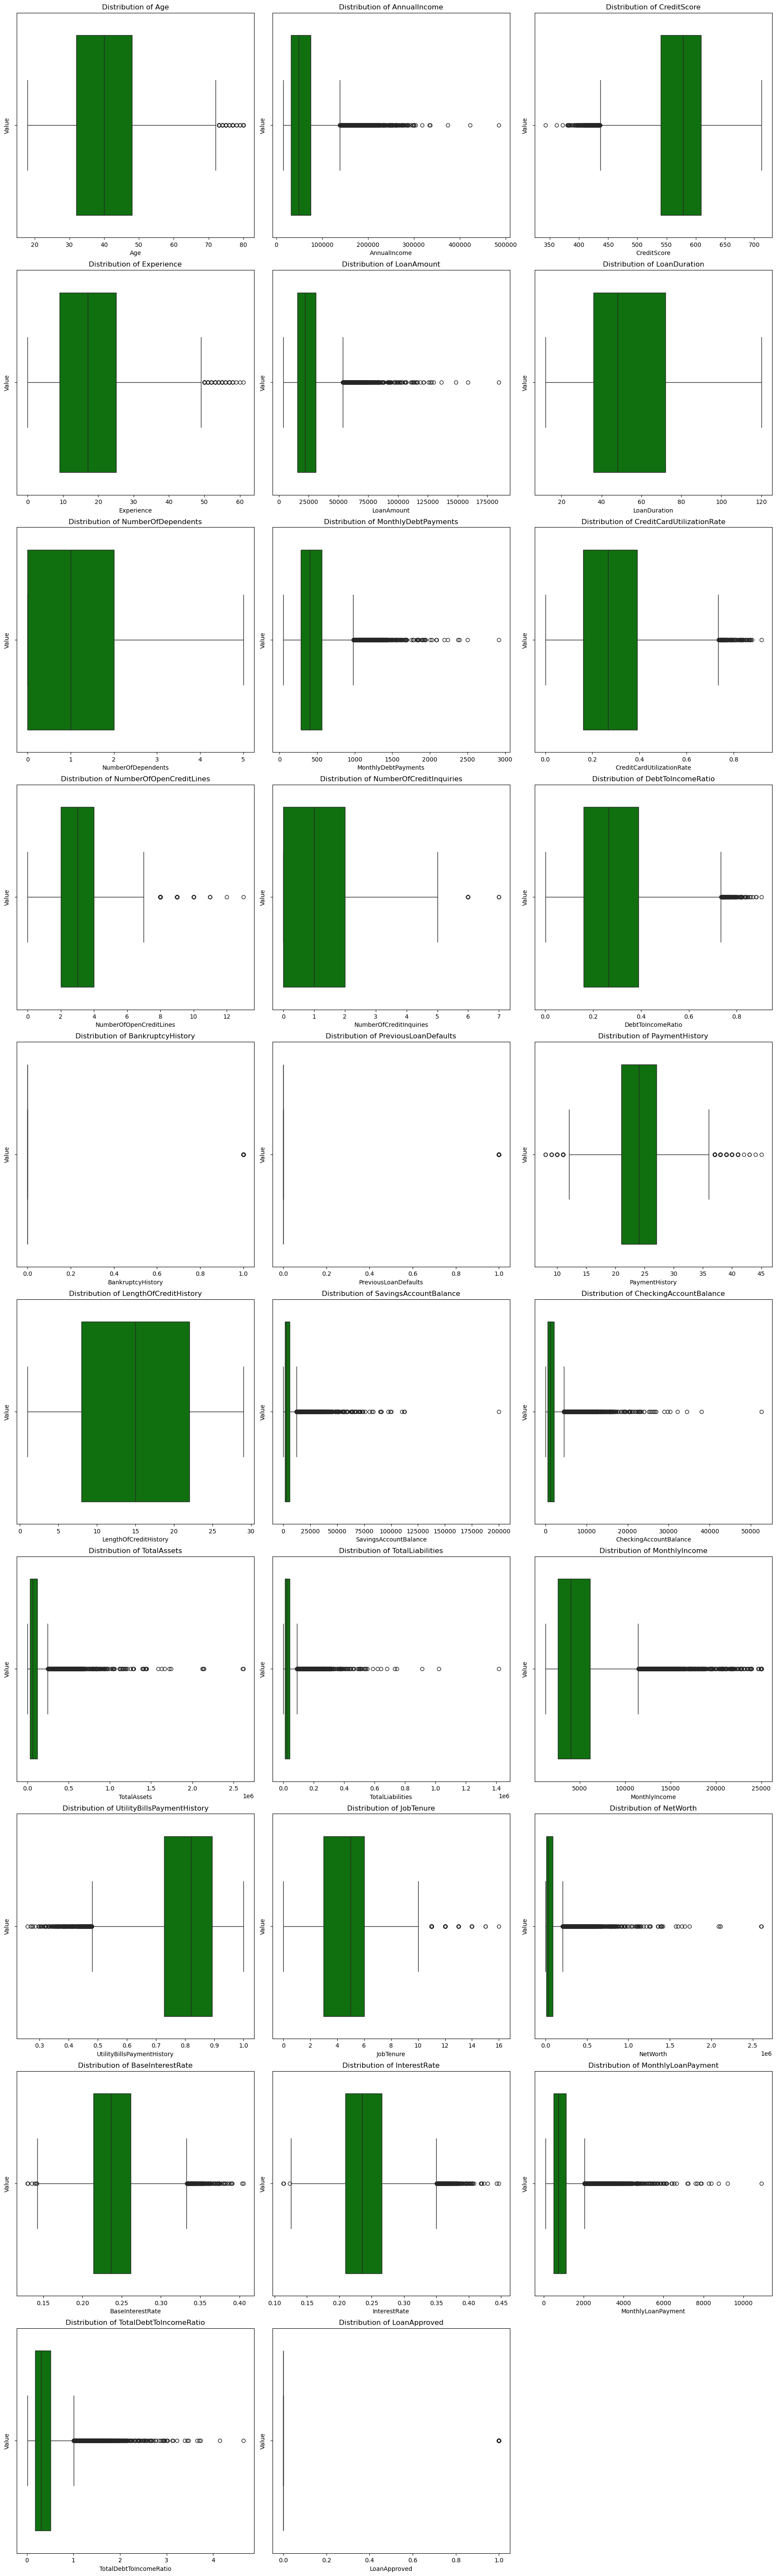

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot
numerical_columns = [
    'Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
    'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
    'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
    'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
    'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
    'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
    'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
    'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved'
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=loan_status, x=column, color='g', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Set x-axis label
    axes[i].set_ylabel('Value')  # Set y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [19]:
# # fist we applying the pair polt
# sns.pairplot(loan_status,hue = 'LoanApproved',palette='Set2')
# plt.show()

In [20]:
correlation_matrix =loan_status.describe().corr()
correlation_matrix

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
Age,1.000000,-0.193680,0.999627,0.999999,-0.129520,0.999998,0.999996,0.991417,0.999996,0.999997,...,-0.145137,0.527311,0.999996,0.999997,-0.153212,0.999996,0.999996,0.870693,0.999996,0.999996
AnnualIncome,-0.193680,1.000000,-0.181675,-0.193750,0.997198,-0.192077,-0.195961,-0.063946,-0.196129,-0.195631,...,0.994751,0.728863,-0.196143,-0.195536,0.995030,-0.196153,-0.196151,0.313541,-0.195952,-0.196122
CreditScore,0.999627,-0.181675,1.000000,0.999600,-0.116641,0.999648,0.999561,0.992760,0.999559,0.999568,...,-0.134415,0.538111,0.999559,0.999571,-0.142775,0.999559,0.999559,0.876082,0.999561,0.999558
Experience,0.999999,-0.193750,0.999600,1.000000,-0.129620,0.999997,0.999997,0.991403,0.999997,0.999998,...,-0.145162,0.527232,0.999997,0.999998,-0.153224,0.999997,0.999997,0.870668,0.999997,0.999997
LoanAmount,-0.129520,0.997198,-0.116641,-0.129620,1.000000,-0.127886,-0.131872,0.001196,-0.132041,-0.131535,...,0.992866,0.772393,-0.132054,-0.131436,0.992283,-0.132066,-0.132064,0.373867,-0.131864,-0.132035
LoanDuration,0.999998,-0.192077,0.999648,0.999997,-0.127886,1.000000,0.999990,0.991633,0.999989,0.999991,...,-0.143606,0.528760,0.999989,0.999992,-0.151676,0.999989,0.999989,0.871480,0.999990,0.999989
NumberOfDependents,0.999996,-0.195961,0.999561,0.999997,-0.131872,0.999990,1.000000,0.991101,1.000000,1.000000,...,-0.147323,0.525275,1.000000,1.000000,-0.155382,1.000000,1.000000,0.869568,1.000000,1.000000
MonthlyDebtPayments,0.991417,-0.063946,0.992760,0.991403,0.001196,0.991633,0.991101,1.000000,0.991078,0.991146,...,-0.015794,0.633726,0.991076,0.991160,-0.024005,0.991075,0.991075,0.927294,0.991102,0.991079
CreditCardUtilizationRate,0.999996,-0.196129,0.999559,0.999997,-0.132041,0.999989,1.000000,0.991078,1.000000,1.000000,...,-0.147488,0.525126,1.000000,1.000000,-0.155547,1.000000,1.000000,0.869484,1.000000,1.000000
NumberOfOpenCreditLines,0.999997,-0.195631,0.999568,0.999998,-0.131535,0.999991,1.000000,0.991146,1.000000,1.000000,...,-0.146995,0.525563,1.000000,1.000000,-0.155056,1.000000,1.000000,0.869734,1.000000,1.000000


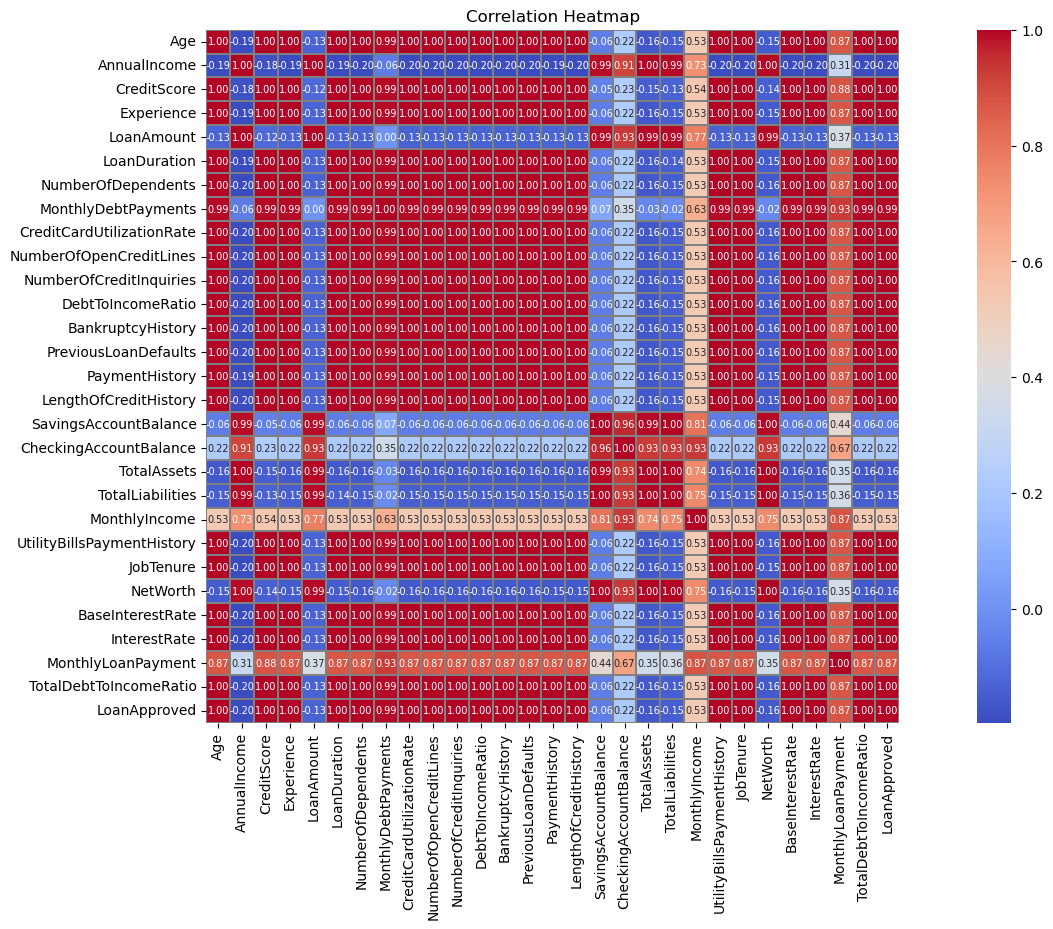

In [21]:
plt.figure(figsize=(20, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

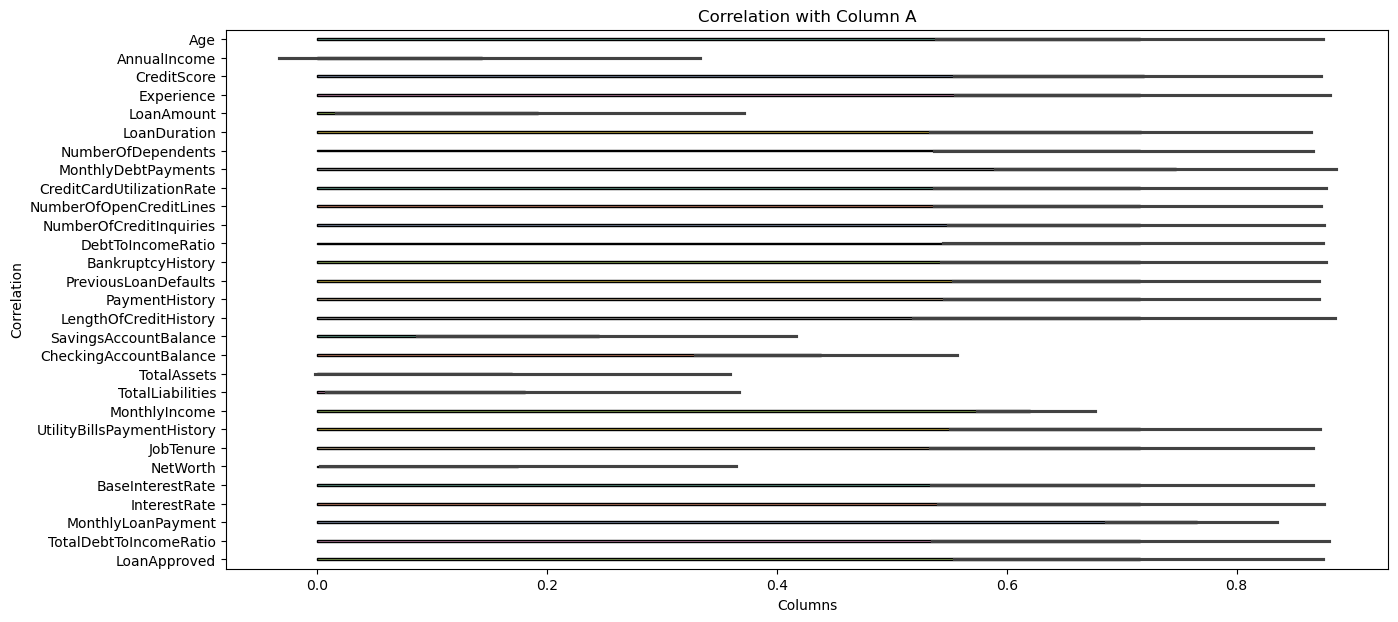

In [22]:
plt.figure(figsize=(15, 7))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix,palette='Set2',edgecolor='black', linewidth=1,width=0.1,orient='h')
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()



In [23]:
loan_status.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [24]:
# Converting to datatime datatype 
loan_status['ApplicationDate'] = pd.to_datetime(loan_status['ApplicationDate'], errors='coerce')


In [25]:
# Extract components from the 'ApplicationDate'
loan_status['date_year'] = loan_status['ApplicationDate'].dt.year
loan_status['date_month'] = loan_status['ApplicationDate'].dt.month
loan_status['date_day'] = loan_status['ApplicationDate'].dt.day
loan_status['date_hour'] = loan_status['ApplicationDate'].dt.hour
loan_status['date_minute'] = loan_status['ApplicationDate'].dt.minute
loan_status['date_second'] = loan_status['ApplicationDate'].dt.second

In [26]:
loan_status.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,date_year,date_month,date_day,date_hour,date_minute,date_second
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0.227590,419.805992,0.181077,0,2018,1,1,0,0,0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0.201077,794.054238,0.389852,0,2018,1,2,0,0,0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0.212548,666.406688,0.462157,0,2018,1,3,0,0,0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0.300911,1047.506980,0.313098,0,2018,1,4,0,0,0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0.175990,330.179140,0.070210,1,2018,1,5,0,0,0


In [27]:
loan_status = loan_status.drop(columns=['ApplicationDate'],axis = 1)


In [28]:
loan_status.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,date_year,date_month,date_day,date_hour,date_minute,date_second
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,0.227590,419.805992,0.181077,0,2018,1,1,0,0,0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,0.201077,794.054238,0.389852,0,2018,1,2,0,0,0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,0.212548,666.406688,0.462157,0,2018,1,3,0,0,0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,0.300911,1047.506980,0.313098,0,2018,1,4,0,0,0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,0.175990,330.179140,0.070210,1,2018,1,5,0,0,0


In [29]:
# here it ussed the for the model 
categorical_columns = loan_status.select_dtypes(include=['object', 'category', 'bool']).columns
print(categorical_columns)


Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')


In [30]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # drop='first' to avoid multicollinearity
loan_status['EmploymentStatus'] = encoder.fit_transform(loan_status[['EmploymentStatus']])
loan_status['EducationLevel'] = encoder.fit_transform(loan_status[['EducationLevel']])
loan_status['MaritalStatus'] = encoder.fit_transform(loan_status[['MaritalStatus']])
loan_status['HomeOwnershipStatus'] = encoder.fit_transform(loan_status[['HomeOwnershipStatus']])
loan_status['LoanPurpose'] = encoder.fit_transform(loan_status[['LoanPurpose']])
# loan_status['time'] = encoder.fit_transform(loan_status[['time']])

In [31]:
loan_status.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,date_year,date_month,date_day,date_hour,date_minute,date_second
0,45,39948,617,0.0,0.0,22,13152,48,1.0,2,...,0.227590,419.805992,0.181077,0,2018,1,1,0,0,0
1,38,39709,628,0.0,0.0,15,26045,48,0.0,1,...,0.201077,794.054238,0.389852,0,2018,1,2,0,0,0
2,47,40724,570,0.0,1.0,26,17627,36,1.0,2,...,0.212548,666.406688,0.462157,0,2018,1,3,0,0,0
3,58,69084,545,0.0,0.0,34,37898,96,0.0,1,...,0.300911,1047.506980,0.313098,0,2018,1,4,0,0,0
4,37,103264,594,0.0,0.0,17,9184,36,1.0,1,...,0.175990,330.179140,0.070210,1,2018,1,5,0,0,0


In [32]:
numerical_columns = loan_status.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved'],
      dtype='object')


In [33]:
# List of columns to scale
columns_to_scale = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
                    'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 
                    'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 
                    'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 
                    'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 
                    'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
loan_status[columns_to_scale] = scaler.fit_transform(loan_status[columns_to_scale])



In [34]:
loan_status.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,date_year,date_month,date_day,date_hour,date_minute,date_second
0,0.451489,-0.476172,0.890021,0.0,0.0,22,-0.873672,-0.245578,1.0,0.348195,...,-0.272968,-0.729062,0.181077,0,2018,1,1,0,0,0
1,-0.150795,-0.482095,1.105724,0.0,0.0,15,0.086551,-0.245578,0.0,-0.373154,...,-0.901165,-0.174264,0.389852,0,2018,1,2,0,0,0
2,0.623571,-0.456940,-0.031618,0.0,1.0,26,-0.540390,-0.732113,1.0,0.348195,...,-0.629370,-0.363493,0.462157,0,2018,1,3,0,0,0
3,1.570017,0.245912,-0.521852,0.0,0.0,34,0.969319,1.700559,0.0,-0.373154,...,1.464331,0.201463,0.313098,0,2018,1,4,0,0,0
4,-0.236835,1.093004,0.439006,0.0,0.0,17,-1.169194,-0.732113,1.0,-0.373154,...,-1.495584,-0.861928,0.070210,1,2018,1,5,0,0,0


In [35]:
x = loan_status.drop(columns='LoanApproved')
y = loan_status['LoanApproved']

In [36]:
x.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,date_year,date_month,date_day,date_hour,date_minute,date_second
0,0.451489,-0.476172,0.890021,0.0,0.0,22,-0.873672,-0.245578,1.0,0.348195,...,-1.111623,-0.272968,-0.729062,0.181077,2018,1,1,0,0,0
1,-0.150795,-0.482095,1.105724,0.0,0.0,15,0.086551,-0.245578,0.0,-0.373154,...,-0.903420,-0.901165,-0.174264,0.389852,2018,1,2,0,0,0
2,0.623571,-0.456940,-0.031618,0.0,1.0,26,-0.540390,-0.732113,1.0,0.348195,...,-0.605407,-0.629370,-0.363493,0.462157,2018,1,3,0,0,0
3,1.570017,0.245912,-0.521852,0.0,0.0,34,0.969319,1.700559,0.0,-0.373154,...,1.725605,1.464331,0.201463,0.313098,2018,1,4,0,0,0
4,-0.236835,1.093004,0.439006,0.0,0.0,17,-1.169194,-0.732113,1.0,-0.373154,...,-1.181127,-1.495584,-0.861928,0.070210,2018,1,5,0,0,0


In [37]:
y

0        0
1        0
2        0
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: LoanApproved, Length: 20000, dtype: int64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
x_train.shape

(14000, 39)

In [40]:
x_test.shape 

(6000, 39)

In [50]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # or 'val_accuracy' if you prefer
    patience=20,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Print messages when stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Making the model 

In [65]:
# Initialize the ANN
model = Sequential()

# Add input layer and the first hidden layer
model.add(Dense(units=128, activation='relu', input_dim=39,kernel_regularizer=tf.keras.regularizers.l1(0.001)))
# model.kernel_regularizer=regularizers.l2(0.01)
model.add(Dropout(0.2))

# Add a second hidden layer
model.add(Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))

# Add Dropout to prevent overfitting
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 13,441 (52.50 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
from keras.optimizers import Adam

# Compile the model for binary classification
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy',   # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

In [68]:

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test),callbacks=[early_stopping],verbose=1
)



Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6123 - loss: 35.9063 - val_accuracy: 0.7538 - val_loss: 2.1155
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6449 - loss: 14.3671 - val_accuracy: 0.7537 - val_loss: 1.8520
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6413 - loss: 5.6041 - val_accuracy: 0.7537 - val_loss: 1.2093
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6699 - loss: 2.2024 - val_accuracy: 0.7537 - val_loss: 1.1541
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7454 - loss: 1.3839 - val_accuracy: 0.7537 - val_loss: 1.1270
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7556 - loss: 1.1815 - val_accuracy: 0.7537 - val_loss: 1.0984
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7608 - loss: 1.1229 - val_accuracy: 0.7537 - val_loss: 1.0732
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7608 - loss: 1.0845 - val_ac

In [69]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7454 - loss: 2.1411
Test Loss: 2.1155
Test Accuracy: 75.38%


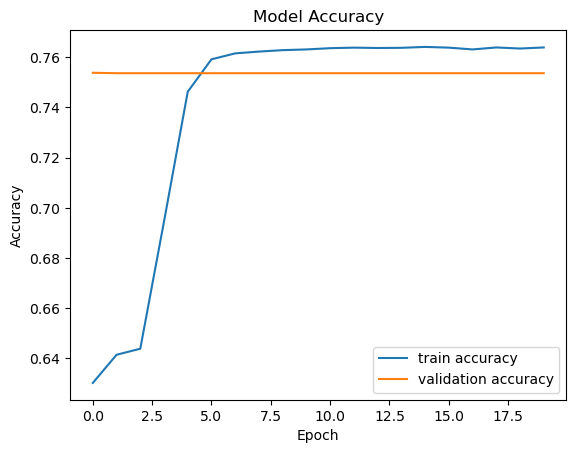

In [70]:

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

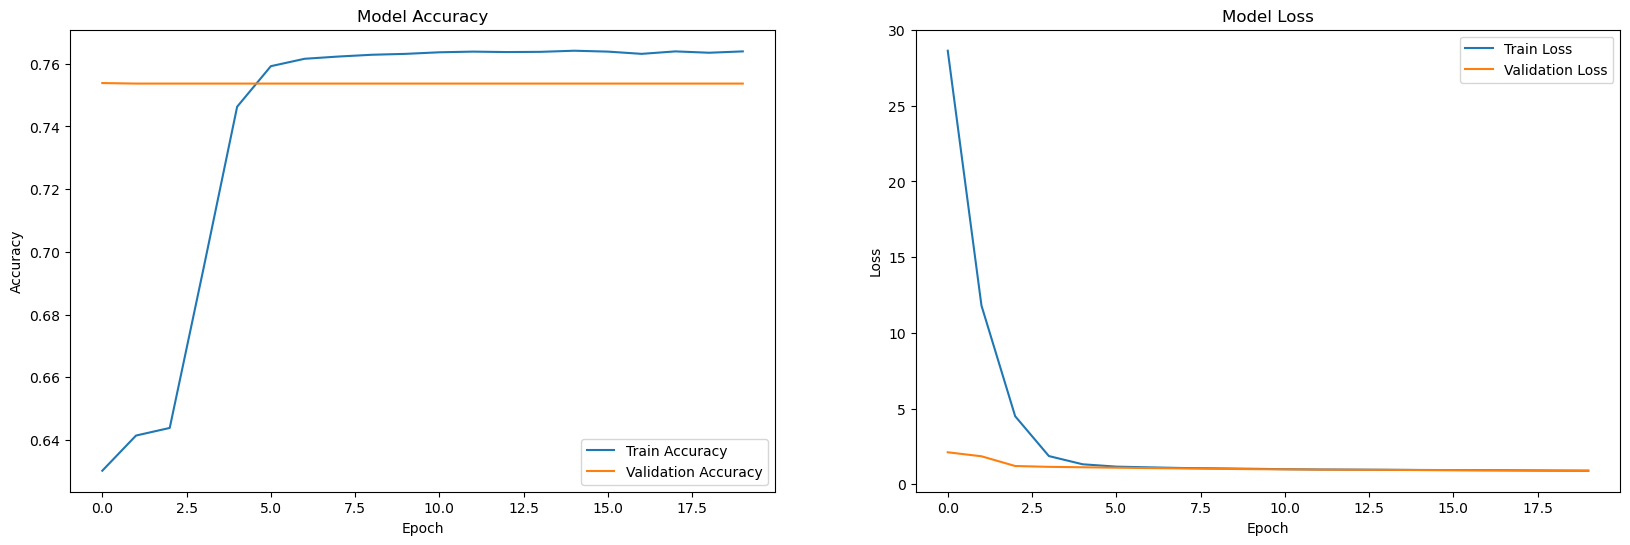

In [71]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [72]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels if binary classification

# Compute classification metrics
# print('Confusion Matrix:')
# print(confusion_matrix(y_test, y_pred_classes))
# print('\nClassification Report:')
print(classification_report(y_test, y_pred_classes))


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4522
           1       1.00      0.00      0.00      1478

    accuracy                           0.75      6000
   macro avg       0.88      0.50      0.43      6000
weighted avg       0.81      0.75      0.65      6000

